In [1]:
import pandas as pd
import numpy as np
import dateutil
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
#Aesthetics
sns.set_style("darkgrid")
%matplotlib inline

In [3]:
tel=pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\Telecom_analysis\data\Week1_challenge_data_source(CSV).csv')
tel.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(tel)

The telecom dataset contains 12.5 % missing values.


In [5]:
tel['TCP DL Retrans. Vol (Bytes)'].fillna(value=tel['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
tel['TCP UL Retrans. Vol (Bytes)'].fillna(value=tel['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)

In [6]:
# drop columns with more than 30% missing values
NA_val = tel.isna().sum()
def na_filter(na, threshold = .3): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/tel.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
tel = tel[na_filter(NA_val)]

In [7]:
tel['Avg RTT DL (ms)'].fillna(value=tel['Avg RTT DL (ms)'].mean(), inplace=True)
tel['Avg RTT UL (ms)'].fillna(value=tel['Avg RTT UL (ms)'].mean(), inplace=True)

In [8]:
tel = tel.dropna()

In [9]:
def format_float(value):
    return f'{value:,.2f}'
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def total_column(col_1,col_2):
    new_col = col_1+col_2
    return new_col 

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df
pd.options.display.float_format = format_float

In [10]:
tel=tel.drop(['Bearer Id','Start','Start ms','End','End ms','Dur. (ms)','IMSI','IMEI','Last Location Name','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','UL TP > 300 Kbps (%)','Activity Duration UL (ms)','Activity Duration DL (ms)','Dur. (ms).1','Handset Manufacturer','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B','50 Kbps < UL TP < 300 Kbps (%)','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)'],axis=1, inplace = False)

In [11]:
tel.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
0,"33,664,962,239.00",42.00,5.00,23.00,44.00,"20,809,914.27","759,658.66",Samsung Galaxy A5 Sm-A520F
1,"33,681,854,413.00",65.00,5.00,16.00,26.00,"20,809,914.27","759,658.66",Samsung Galaxy J5 (Sm-J530)
2,"33,760,627,129.00",109.80,17.66,6.00,9.00,"20,809,914.27","759,658.66",Samsung Galaxy A8 (2018)
3,"33,750,343,200.00",109.80,17.66,44.00,44.00,"20,809,914.27","759,658.66",undefined
4,"33,699,795,932.00",109.80,17.66,6.00,9.00,"20,809,914.27","759,658.66",Samsung Sm-G390F


In [12]:
tel['TCP DL Retrans. Vol (Bytes)'] = convert_bytes_to_megabytes(tel,'TCP DL Retrans. Vol (Bytes)')
tel['TCP UL Retrans. Vol (Bytes)'] = convert_bytes_to_megabytes(tel,'TCP UL Retrans. Vol (Bytes)')

In [13]:
tel.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
0,"33,664,962,239.00",42.00,5.00,23.00,44.00,20.81,0.76,Samsung Galaxy A5 Sm-A520F
1,"33,681,854,413.00",65.00,5.00,16.00,26.00,20.81,0.76,Samsung Galaxy J5 (Sm-J530)
2,"33,760,627,129.00",109.80,17.66,6.00,9.00,20.81,0.76,Samsung Galaxy A8 (2018)
3,"33,750,343,200.00",109.80,17.66,44.00,44.00,20.81,0.76,undefined
4,"33,699,795,932.00",109.80,17.66,6.00,9.00,20.81,0.76,Samsung Sm-G390F


In [14]:
def average_column(col_1,col_2):
    new_col = (col_1+col_2)/2
    return new_col 

In [15]:
tel['TCP_Avg']=average_column(tel['TCP DL Retrans. Vol (Bytes)'],tel['TCP UL Retrans. Vol (Bytes)'])
tel['RTT_Avg']=average_column(tel['Avg RTT DL (ms)'],tel['Avg RTT UL (ms)'])
tel['Thru_put_Avg']=average_column(tel['Avg Bearer TP DL (kbps)'],tel['Avg Bearer TP UL (kbps)'])
tel.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,TCP_Avg,RTT_Avg,Thru_put_Avg
0,"33,664,962,239.00",42.00,5.00,23.00,44.00,20.81,0.76,Samsung Galaxy A5 Sm-A520F,10.78,23.50,33.50
1,"33,681,854,413.00",65.00,5.00,16.00,26.00,20.81,0.76,Samsung Galaxy J5 (Sm-J530),10.78,35.00,21.00
2,"33,760,627,129.00",109.80,17.66,6.00,9.00,20.81,0.76,Samsung Galaxy A8 (2018),10.78,63.73,7.50
3,"33,750,343,200.00",109.80,17.66,44.00,44.00,20.81,0.76,undefined,10.78,63.73,44.00
4,"33,699,795,932.00",109.80,17.66,6.00,9.00,20.81,0.76,Samsung Sm-G390F,10.78,63.73,7.50


In [16]:
tel['TCP_Avg'].head(500)

0     10.78
1     10.78
2     10.78
3     10.78
4     10.78
       ... 
502   10.52
504    0.41
505    0.35
506   10.78
507    2.10
Name: TCP_Avg, Length: 500, dtype: float64

In [19]:
experienc = ['MSISDN/Number','Handset Type','TCP_Avg','RTT_Avg','Thru_put_Avg']
EA=tel[experienc]
EA.head()

,MSISDN/Number,Handset Type,TCP_Avg,RTT_Avg,Thru_put_Avg
0,"33,664,962,239.00",Samsung Galaxy A5 Sm-A520F,10.78,23.50,33.50
1,"33,681,854,413.00",Samsung Galaxy J5 (Sm-J530),10.78,35.00,21.00
2,"33,760,627,129.00",Samsung Galaxy A8 (2018),10.78,63.73,7.50
3,"33,750,343,200.00",undefined,10.78,63.73,44.00
4,"33,699,795,932.00",Samsung Sm-G390F,10.78,63.73,7.50


In [20]:
EA['TCP_Avg'].head(5000)

0      10.78
1      10.78
2      10.78
3      10.78
4      10.78
        ... 
5096   10.78
5097   10.78
5098    0.08
5099   10.78
5100    2.37
Name: TCP_Avg, Length: 5000, dtype: float64

In [21]:
RTT_avg=EA.groupby('MSISDN/Number', as_index=False).agg({"RTT_Avg": "sum"}).sort_values('RTT_Avg', ascending= False)[:10]
RTT_avg

,MSISDN/Number,RTT_Avg
47501,"33,662,317,023.00","48,462.00"
41522,"33,660,874,265.00","32,335.00"
79412,"33,683,692,867.00","27,424.00"
84793,"33,698,551,167.00","23,010.50"
95398,"33,761,813,523.00","18,542.00"
69427,"33,668,791,629.00","18,152.00"
92861,"33,760,941,100.00","13,639.00"
1685,"33,606,788,933.00","13,150.00"
73473,"33,671,816,754.00","12,857.50"
103221,"33,781,865,588.00","12,694.00"


In [22]:
Thru_avg=EA.groupby('MSISDN/Number', as_index=False).agg({"Thru_put_Avg": "sum"}).sort_values('Thru_put_Avg', ascending= False)[:10]
Thru_avg

,MSISDN/Number,Thru_put_Avg
96562,"33,762,333,464.00","451,111.00"
69196,"33,668,708,263.00","420,212.00"
35878,"33,659,546,392.00","399,171.00"
72392,"33,669,946,573.00","345,407.50"
68322,"33,668,425,947.00","338,429.00"
83608,"33,698,174,760.00","309,397.50"
12998,"33,625,700,673.00","282,089.50"
29003,"33,658,075,438.00","275,176.00"
97182,"33,762,644,658.00","274,830.50"
60162,"33,665,658,364.00","265,176.50"


In [23]:
EA.groupby(['MSISDN/Number', 'Handset Type'])['Handset Type'].value_counts(20)

MSISDN/Number           Handset Type                    Handset Type                  
33,601,001,722.00       Huawei P20 Lite Huawei Nova 3E  Huawei P20 Lite Huawei Nova 3E   1.00
33,601,001,754.00       Apple iPhone 7 (A1778)          Apple iPhone 7 (A1778)           1.00
33,601,002,511.00       undefined                       undefined                        1.00
33,601,007,832.00       Apple iPhone 5S (A1457)         Apple iPhone 5S (A1457)          1.00
33,601,008,617.00       Apple iPhone Se (A1723)         Apple iPhone Se (A1723)          1.00
                                                                                         ... 
33,789,967,113.00       Apple iPhone 6S (A1688)         Apple iPhone 6S (A1688)          1.00
33,789,980,299.00       undefined                       undefined                        1.00
33,789,996,170.00       Huawei Honor 9 Lite             Huawei Honor 9 Lite              1.00
33,789,997,247.00       Apple iPhone 8 Plus (A1897)     Apple iPhon

In [24]:
RTT_avg=EA.groupby('MSISDN/Number', as_index=False).agg({"Handset Type": "count"}).sort_values('Handset Type', ascending= False)[:10]
RTT_avg

,MSISDN/Number,Handset Type
13381,"33,626,320,676.00",18
6353,"33,614,892,860.00",17
13037,"33,625,779,332.00",17
36669,"33,659,725,664.00",16
75564,"33,675,877,202.00",15
91949,"33,760,536,639.00",15
64472,"33,667,163,239.00",13
653,"33,603,127,838.00",12
91608,"33,760,413,819.00",12
13845,"33,627,080,969.00",12


In [25]:
def top(df,col,no:int):
    largest = df.nlargest(no,[col])
    return largest

In [26]:
top(EA,'Thru_put_Avg',10)

,MSISDN/Number,Handset Type,TCP_Avg,RTT_Avg,Thru_put_Avg
120876,"33,661,168,806.00",Huawei B528S-23A,0.64,48.00,"191,131.00"
143670,"33,672,505,906.00",Samsung Galaxy S9 Sm-G960F Ds,0.05,22.00,"156,622.00"
141250,"33,698,174,760.00",undefined,30.65,24.50,"152,149.50"
91298,"33,666,615,543.00",Apple iPhone 8 (A1905),4.84,29.50,"150,273.00"
116794,"33,659,907,570.00",Apple iPhone Xs Max (A2101),5.84,17.50,"141,965.50"
141449,"33,665,658,364.00",Huawei B528S-23A,2.21,45.00,"140,572.00"
149616,"33,651,688,261.00",Apple iPhone Xs Max (A2101),0.46,19.00,"138,576.00"
92177,"33,668,563,049.00",Apple iPhone Xr (A2105),14.01,24.50,"138,102.50"
116550,"33,665,490,907.00",Apple iPhone Xr (A2105),3.27,34.50,"137,026.00"
117776,"33,768,694,413.00",undefined,0.41,27.50,"134,944.00"


In [30]:
top(EA,'RTT_Avg',10)

,MSISDN/Number,Handset Type,TCP_Avg,RTT_Avg,Thru_put_Avg
30155,"33,662,317,023.00",Apple iPhone 8 (A1905),10.78,"48,462.00",1.50
29916,"33,660,874,265.00",Apple iPhone 6 (A1586),10.78,"32,320.50",64.00
5963,"33,683,692,867.00",Lg Lg-D315,0.38,"27,424.00",10.50
22839,"33,760,941,100.00",Samsung Galaxy S7 Edge (Sm-G935X),0.27,"13,639.00","2,574.00"
23442,"33,606,788,933.00",Samsung Galaxy S9 Plus (Sm-G965F),0.39,"13,150.00",72.00
1361,"33,698,551,167.00",Huawei B528S-23A,0.01,"12,961.00",82.50
81256,"33,671,816,754.00",Samsung Galaxy S6 Edge (Sm-G925X),10.41,"12,857.50",35.50
97312,"33,781,865,588.00",Apple iPhone 6S (A1688),0.10,"12,694.00",804.00
100575,"33,784,013,667.00",Apple iPhone 8 (A1905),10.78,"12,369.00",41.50
97905,"33,629,634,832.00",Samsung Galaxy A5 Sm-A520F,0.18,"10,490.00",104.00


In [31]:
top(EA,'TCP_Avg',10)

,MSISDN/Number,Handset Type,TCP_Avg,RTT_Avg,Thru_put_Avg
34636,"33,660,452,751.00",Huawei B528S-23A,"2,172.06",55.00,"92,671.00"
140797,"33,698,575,965.00",Huawei B528S-23A,"2,150.74",243.00,"15,883.00"
77950,"33,762,109,416.00",Huawei B528S-23A,"2,147.22",58.00,"56,020.00"
135677,"33,658,718,266.00",Huawei B528S-23A,"2,145.73",66.50,"27,880.50"
3741,"33,658,706,088.00",Huawei B528S-23A,"2,144.06",40.50,"47,091.00"
119667,"33,664,689,058.00",Huawei B528S-23A,"2,137.75",246.00,"27,926.00"
39608,"33,664,907,178.00",Huawei B528S-23A,"2,134.32",226.50,"27,604.50"
59011,"33,762,333,446.00",Huawei B528S-23A,"2,130.81",56.50,"28,405.50"
76971,"33,658,281,911.00",Huawei B528S-23A,"2,130.09",59.50,"24,419.50"
41182,"33,658,633,234.00",Huawei B528S-23A,"2,127.33",44.00,"58,566.50"


In [27]:
def small(df,col,no:int):
    small = df.nsmallest(no,[col])
    return small

In [28]:
small(EA,'TCP_Avg',10)

,MSISDN/Number,Handset Type,TCP_Avg,RTT_Avg,Thru_put_Avg
143594,"33,658,794,235.00",Huawei E5180,0.00,180.50,205.50
111100,"33,650,128,412.00",Apple iPhone 5S (A1457),0.00,24.00,"15,290.50"
18417,"33,681,782,404.00",Huawei P9 Lite,0.00,26.50,"23,883.00"
13142,"33,659,400,378.00",Apple iPhone 6 (A1586),0.00,28.00,"2,527.50"
97061,"33,641,080,629.00",Apple iPhone 6 (A1549),0.00,40.50,125.50
8794,"33,614,777,138.00",Huawei Ascend Mate7,0.00,32.00,"4,327.00"
99947,"33,762,062,356.00",Apple iPhone 8 (A1905),0.00,20.50,"16,288.50"
83214,"33,768,257,339.00",undefined,0.00,29.50,"2,401.50"
95955,"33,626,357,513.00",Apple iPhone 7 (A1778),0.00,20.00,"5,482.00"
12849,"33,607,833,304.00",Apple iPhone 5C (A1529),0.00,16.00,"8,426.50"


In [32]:
small(EA,'RTT_Avg',10)

,MSISDN/Number,Handset Type,TCP_Avg,RTT_Avg,Thru_put_Avg
42602,"33,652,982,188.00",Huawei P20 Pro,10.78,0.00,50.00
103321,"33,609,260,285.00",Samsung Galaxy S6 (Sm-G920X),10.78,0.00,49.50
124538,"33,661,575,382.00",Huawei Pct-L29,10.78,0.00,42.50
143878,"33,642,753,301.00",Apple iPhone 6 (A1586),10.78,0.00,50.00
71738,"33,660,204,450.00",Apple iPhone X (A1901),10.78,1.00,56.50
50966,"33,695,045,499.00",Huawei P20,10.78,2.00,60.50
144923,"33,611,712,566.00",Huawei Mate 10 Pro Porsche Design Huawei Mate 10,10.78,2.00,48.00
103544,"33,659,493,541.00",Apple iPhone 6S (A1688),10.78,2.50,39.00
8756,"33,762,276,597.00",Huawei P20 Lite Huawei Nova 3E,10.78,3.00,48.50
123210,"33,668,619,895.00",Apple iPhone 6S (A1688),10.78,3.00,50.50


In [33]:
small(EA,'Thru_put_Avg',10)

,MSISDN/Number,Handset Type,TCP_Avg,RTT_Avg,Thru_put_Avg
614,"33,658,211,925.00",Wct Uno,10.78,63.73,0.00
2460,"33,761,309,821.00",Lg Lg-T385,10.78,70.90,0.00
9347,"33,650,241,905.00",Huawei P20 Lite Huawei Nova 3E,10.78,57.40,0.00
14019,"33,659,471,143.00",Huawei P20 Pro,10.78,63.73,0.00
14871,"33,634,247,429.00",Huawei Y6 2018,10.78,63.73,0.00
20490,"33,667,336,746.00",undefined,10.78,638.50,0.00
21173,"33,604,131,582.00",Lenovo Moto G (3Rd Gen) Ca12459445,10.78,63.73,0.00
24562,"33,650,000,334.00",undefined,10.78,57.40,0.00
66937,"33,661,089,447.00",Huawei B528S-23A,10.78,63.73,0.00
69240,"33,616,110,252.00",Apple iPhone Xr (A2105),10.78,63.73,0.00


In [29]:
def freq(df,col,by:int):
    df = df[[col]].value_counts()[:by]
    return df
    

In [34]:
freq(EA,'TCP_Avg',10)

TCP_Avg
10.78      83580
10.41        649
0.38         245
10.41        235
0.38         136
10.41        128
0.38         126
0.38         114
0.38         104
10.41         97
dtype: int64

In [35]:
freq(EA,'RTT_Avg',10)

RTT_Avg
63.73      26118
14.50       4987
19.50       4205
19.00       2755
20.00       2635
15.00       2591
14.00       2423
24.50       2200
20.50       1962
15.50       1956
dtype: int64

In [37]:
freq(EA,'Thru_put_Avg',10)

Thru_put_Avg
31.50           3884
7.50            3678
48.50           1945
45.00           1882
49.00           1799
48.00           1669
49.50           1569
44.50           1554
45.50           1512
46.50           1490
dtype: int64

In [52]:
def handset(data,col1,col2,n):
    
    hansets=data.sort_values(by = col1,ascending = False)
    
    plt.figure(figsize=(12,9))
    ax=sns.barplot(hansets[col2][:n],hansets[col1][:n],palette='rocket',dodge=False)
    plt.setp(ax.get_xticklabels(),rotation=90)
    plt.title(f'Distribution of the top 30 {col1} per {col2}')
    plt.show

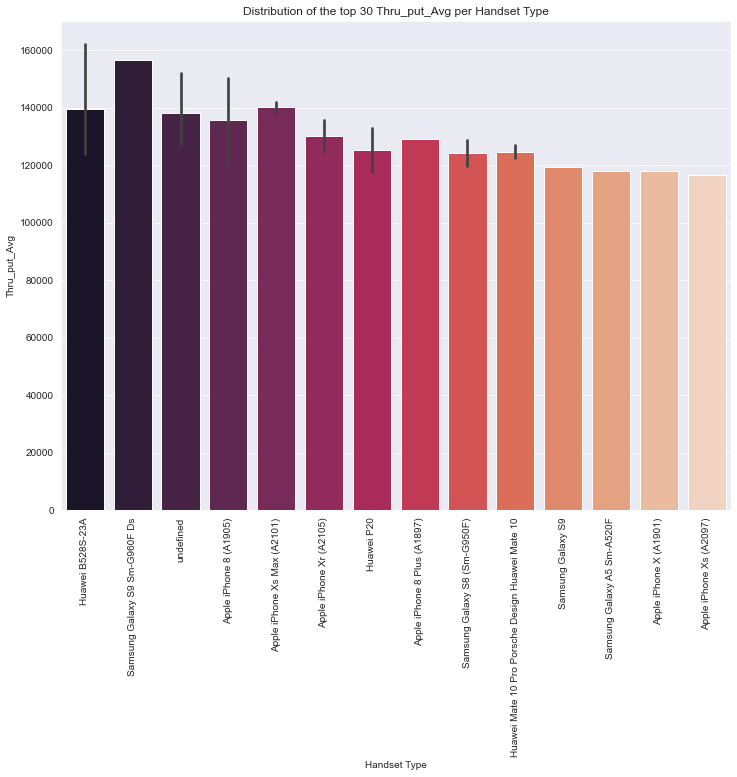

In [53]:
handset(EA,'Thru_put_Avg','Handset Type',30)

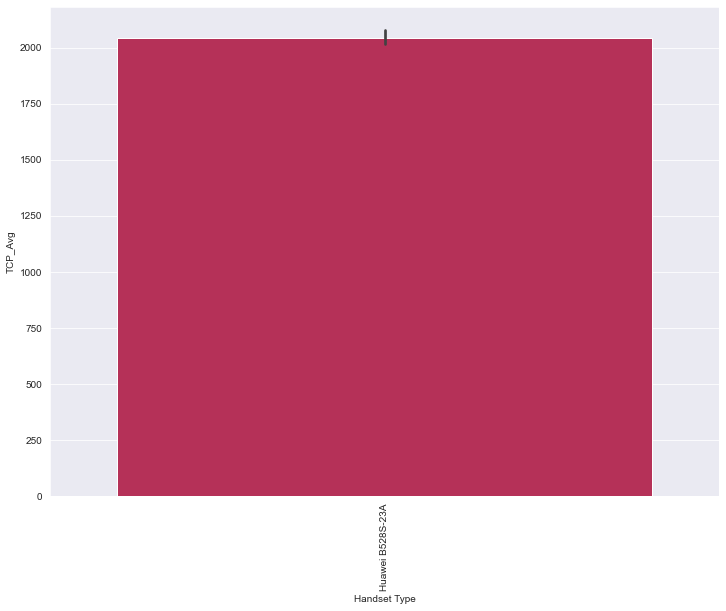

In [51]:
handset(EA,'TCP_Avg','Handset Type',30)

Because we have a categorical column as a metrics to the experience analysis. We are going to encode this column with the pandas , pd.get_dummies function , its a similar function as the one hot encoder and returns colmns for every caegorical column.


In [41]:
data = pd.get_dummies(EA,columns=['Handset Type'])
data

MSISDN/Number  TCP_Avg  RTT_Avg  Thru_put_Avg  \
0      33,664,962,239.00    10.78    23.50         33.50   
1      33,681,854,413.00    10.78    35.00         21.00   
2      33,760,627,129.00    10.78    63.73          7.50   
3      33,750,343,200.00    10.78    63.73         44.00   
4      33,699,795,932.00    10.78    63.73          7.50   
...                  ...      ...      ...           ...   
149995 33,668,648,496.00     8.36   161.00     32,406.50   
149996 33,650,688,697.00    10.78    16.00         58.50   
149997 33,663,449,963.00    10.78    14.50         38.50   
149998 33,621,890,103.00    10.78    24.50         45.00   
149999 33,619,622,058.00    10.78    21.00         35.50   

        Handset Type_A-Link Telecom I. Cubot A5  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
149995                                        0   
149996                                        0   
149997                                        0   
149998                                        0   
149999                                        0   

        Handset Type_A-Link Telecom I. Cubot Note Plus  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
149995                                               0   
149996                                               0   
149997                                               0   
149998                                               0   
149999                                               0   

        Handset Type_A-Link Telecom I. Cubot Note S  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
149995                                            0   
149996                                            0   
149997                                            0   
149998                                            0   
149999                                            0   

        Handset Type_A-Link Telecom I. Cubot Nova  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
149995                                          0   
149996                                          0   
149997                                          0   
149998                                          0   
149999                                          0   

        Handset Type_A-Link Telecom I. Cubot Power  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
149995                                           0   
149996                                           0   
149997                                           0   
149998                                           0   
149999                                           0   

        Handset Type_A-Link Telec

Our dataset has increeased to 1376 columns which is lot and might strainour algorithm. it is advaisable to perfomr PCA and reduce the columns to a 2 dimention daaframe.
Before perfmoring PCA we first have to Standardize our data then pass it to the PCA 

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Stand_engagement_metrics=scaler.fit_transform(data)

In [43]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(Stand_engagement_metrics)

In [45]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
cluster =Kmean.fit_predict(principalComponents)
cluster

array([0, 0, 0, ..., 0, 0, 0])

After getting the clusters we can now plot a grpah and also findd the mean of every metrics per cluster 

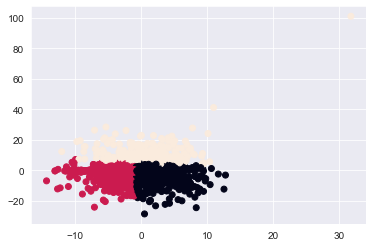

In [46]:
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=cluster)
plt.show()

In [47]:
data['cluster']=cluster

In [ ]:
data

In [48]:
engagement_met=data.groupby('cluster', as_index=False).agg({'TCP_Avg':np.mean,'RTT_Avg':np.mean,'Thru_put_Avg':np.mean})
engagement_met

,cluster,TCP_Avg,RTT_Avg,Thru_put_Avg
0,0,8.17,56.03,"3,258.33"
1,1,22.29,66.16,"26,163.18"
2,2,6.34,934.47,"5,319.70"
